In [79]:
# Load the dataset
import pandas as pd
df = pd.read_csv('Admission_Predict.csv')

   GRE  TOEFL  University_Rating  SOP  LOR  CGPA  Research  Chance_of_Admit
0  337    118                  4  4.5  4.5  9.65         1             0.92
1  324    107                  4  4.0  4.5  8.87         1             0.76
2  316    104                  3  3.0  3.5  8.00         1             0.72
3  322    110                  3  3.5  2.5  8.67         1             0.80
4  314    103                  2  2.0  3.0  8.21         0             0.65
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE                500 non-null    int64  
 1   TOEFL              500 non-null    int64  
 2   University_Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Cha

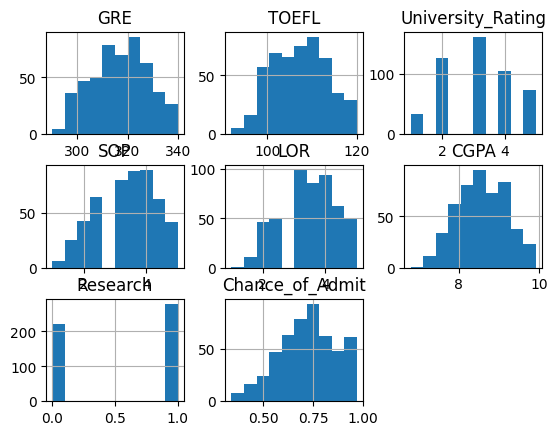

In [80]:
# Perform EDA
print(df.head())  # Check the first few rows of data
print(df.info())  # Check the data types and missing values
print(df.describe())  # Check the statistical summary of data
print(df.corr())  # Check the correlation between the features
print(df.hist())  # Check the distribution of data


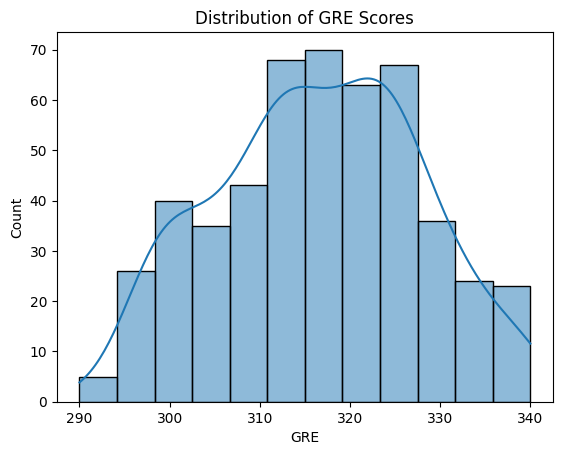

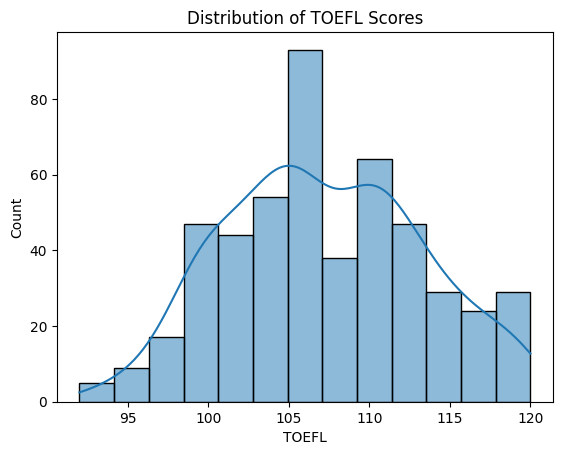

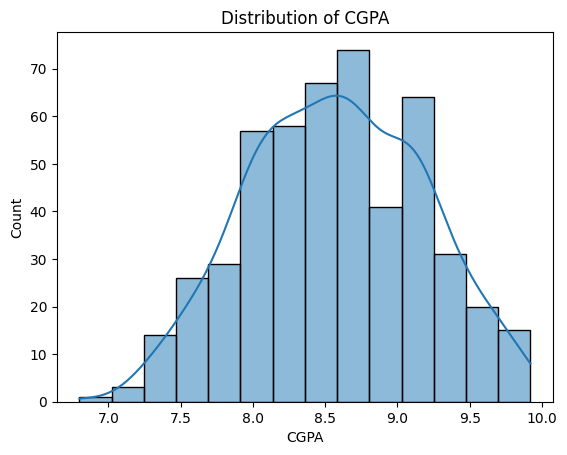

In [81]:
# Visualize the distribution of variables
sns.histplot(df['GRE'], kde=True)
plt.title('Distribution of GRE Scores')
plt.show()

sns.histplot(df['TOEFL'], kde=True)
plt.title('Distribution of TOEFL Scores')
plt.show()

sns.histplot(df['CGPA'], kde=True)
plt.title('Distribution of CGPA')
plt.show()

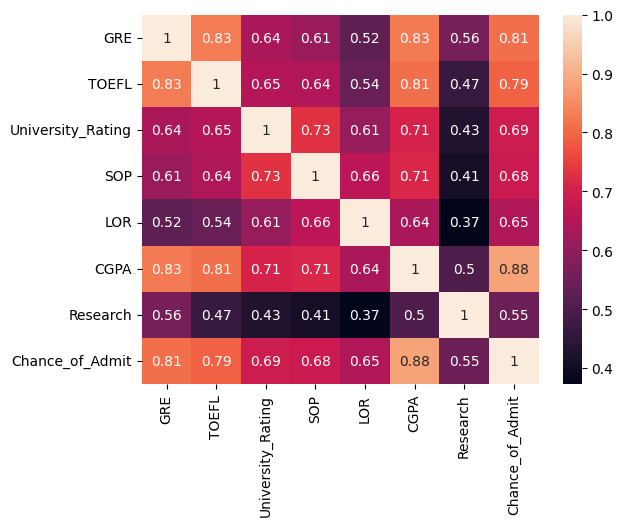

In [82]:
# Examine the correlation between variables
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [83]:
# Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [84]:
# Split the data into training and testing sets
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [85]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

In [86]:
# Evaluate the model's performance
from math import sqrt
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Squared Error: 0.004071374949577159
Root Mean Squared Error: 0.06380732677034166
Mean Absolute Error: 0.046868797533320065
R-squared: 0.8046080162568263


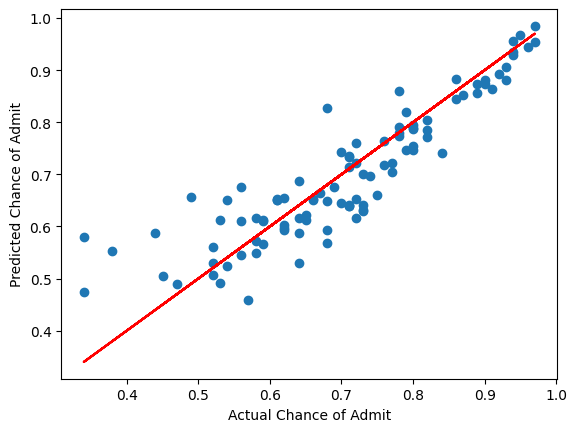

In [87]:
# Visualize the results
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.show()

In [88]:
pd.DataFrame(regressor.coef_, df.columns[:-1], columns=['Coefficient'])

,Coefficient
GRE,0.001790
TOEFL,0.003200
University_Rating,0.012542
SOP,-0.004867
LOR,0.017730
CGPA,0.112220
Research,0.024987
